In [1]:
!pip install matplotlib koreanize-matplotlib 

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.9 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.9 MB 5.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/7.9 MB 4.1 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.9 MB 6.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/7.9 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 7.1 MB/s  0:00:01


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

In [4]:
img = Image.open("./data/sample00.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 요소의 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (1000, 1000, 3)
배열 요소의 데이터 타입:  uint8
배열 차원:  3


In [6]:
img_data=pd.DataFrame(img_arr[:,:,0])
img_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
1,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
2,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
3,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
4,12,12,12,12,12,12,12,12,14,14,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
996,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
997,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
998,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [7]:
img_data.to_csv("./data/img_data_00.csv", index=False, encoding="utf-8-sig")

<function matplotlib.pyplot.show(close=None, block=None)>

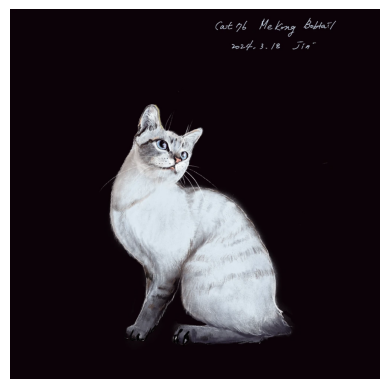

In [8]:
# 흑백-> 2차원, 컬러-> 3차원
plt.imshow(img_arr)
plt.axis('off')
plt.show

# 이미지 조작하기

배열 타입:  <class 'numpy.ndarray'>
배열 shape:  (505, 1000, 3)
배열 요소의 데이터 타입:  uint8
배열 차원:  3


<function matplotlib.pyplot.show(close=None, block=None)>

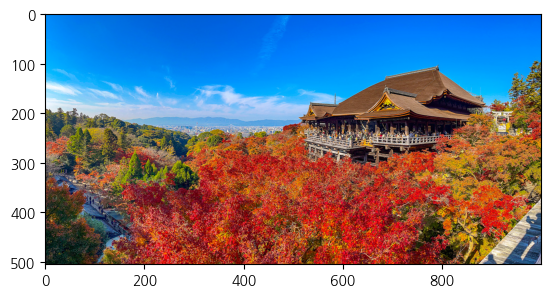

In [12]:
img = Image.open("./data/sample1.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape: ", img_arr.shape)
print("배열 요소의 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)
plt.imshow(img_arr)
# plt.axis('off')
plt.show

In [11]:
h,w,c=img_arr.shape
print(f"높이:{h}, 넓이:{w}, 채널:{c}")

높이:505, 넓이:1000, 채널:3


# 슬라이싱을 이용해서 이미지에서 일부분 잘라오기

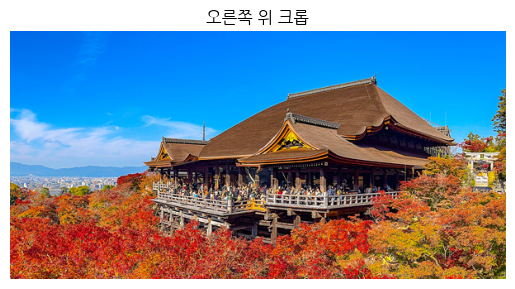

In [14]:
# 높이는 50~350, 넓이는 350~950
crop=img_arr[50:351,350:951]
plt.imshow(crop)
plt.axis('off')
plt.title("오른쪽 위 크롭")
plt.show()

# 이미지의 채널 별로 따로 출력하기

In [15]:
# RGB 채널 분리
R=img_arr[:,:,0]
G=img_arr[:,:,1]
B=img_arr[:,:,2]

<function matplotlib.pyplot.show(close=None, block=None)>

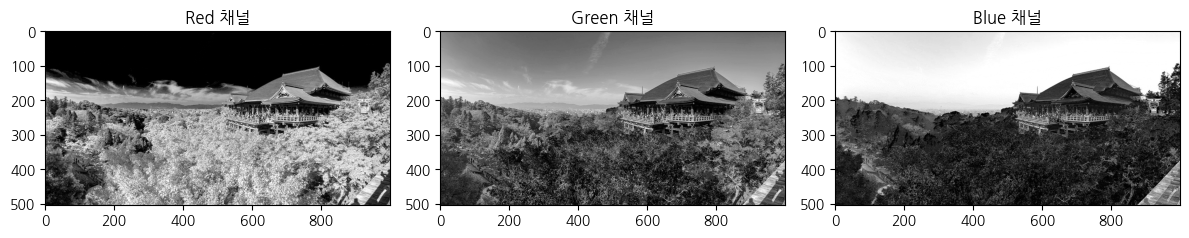

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R,cmap='gray');plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(G,cmap='gray');plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(B,cmap='gray');plt.title("Blue 채널")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

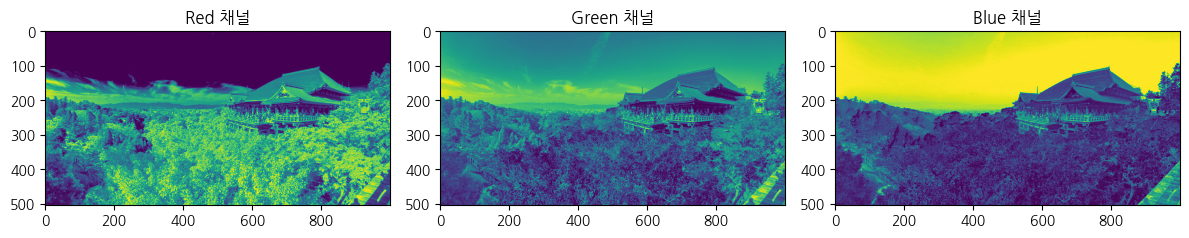

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(R);plt.title("Red 채널")
plt.subplot(1,3,2); plt.imshow(G);plt.title("Green 채널")
plt.subplot(1,3,3); plt.imshow(B);plt.title("Blue 채널")
plt.tight_layout()
plt.show

In [18]:
# 채널 순서를 BGR로 바꿔보기

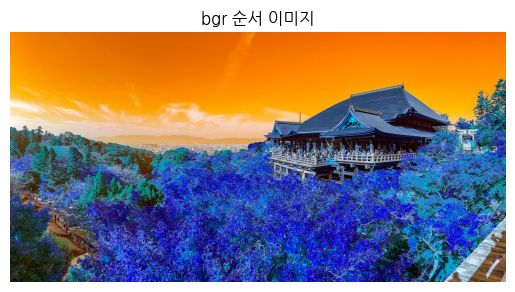

In [19]:
bgr_arr=np.dstack([B,G,R])
plt.imshow(bgr_arr)
plt.axis('off')
plt.title("bgr 순서 이미지")
plt.show()

# 브로드 캐스팅 연산으로 컬러를 흑백으로 바꾸기

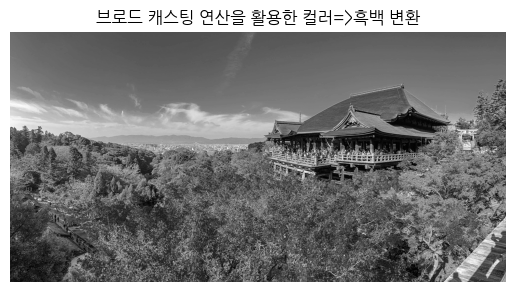

In [24]:
gray_arr=(R * 0.299 + G *0.587 + B * 0.114).astype(np.uint8)
plt.imshow(gray_arr,cmap='gray')
plt.axis('off')
plt.title("브로드 캐스팅 연산을 활용한 컬러=>흑백 변환")
plt.show()

# 브로드 캐스팅 연산으로 이미지 밝기/대비 조절하기

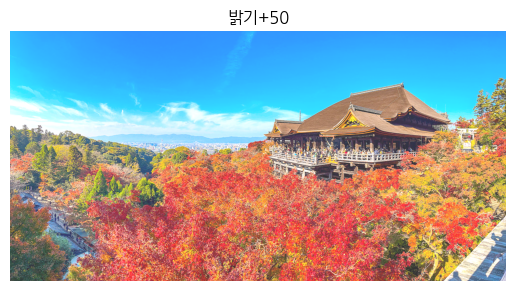

In [25]:
# 밝게 만들기(+50)
brighter=img_arr.astype(np.int16)+50
brighter=np.clip(brighter,0,255).astype(np.uint8) # clip은 255넘으면 255선 내에서 잘라라 이런뜻
plt.imshow(brighter)
plt.axis('off')
plt.title("밝기+50")
plt.show()

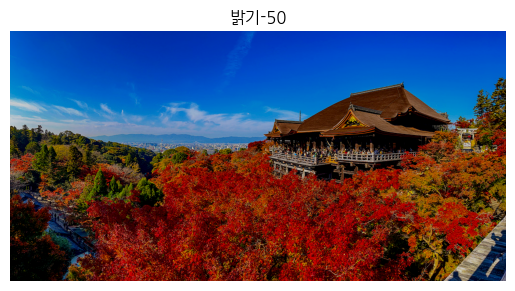

In [26]:
#  어둡게 만들기(-50)
brighter=img_arr.astype(np.int16)-50
brighter=np.clip(brighter,0,255).astype(np.uint8) # clip은 255넘으면 255선 내에서 잘라라 이런뜻
plt.imshow(brighter)
plt.axis('off')
plt.title("밝기-50")
plt.show()

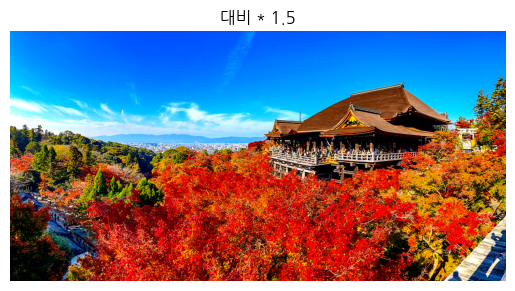

In [28]:
# 대비(contrast) 조절
alpha=1.5 #1보다 크면 대비 올림
contrast=(img_arr.astype(np.float32)-128)*alpha+128
contrast=np.clip(contrast,0,255).astype(np.uint8)
plt.imshow(contrast)
plt.axis('off')
plt.title("대비 * 1.5")
plt.show()